**Group Members: Christ-Brian Amedjonekou, Emmanuel Gil**  
**Date: 05/16/2019**  
**PHYS 3600ID-D862 (Machine Learning) Final Project**  
**Spring 2019, Section: D862, Code: 37026**  
**Instructor: Viviana Acquaviva** 

## Morphology of Galaxies via Convolutional Neural Network

### Abstract:

For this project, we set out to create a Deep Learning Model, specifically a Convoluational Neural Network (CNN), to analyze the morphology classification of galaxies. The goal of this assignment is to act as a introduction to Deep Learning, and Neural Networks. We are expected to present the results of our implementation of the CNN. This includes the algorithm itself, parameter validation, generalization errors, and visualizations. Python, specifically Google's open source ***TensorFlow***, is used to create and implement the CNN for this problem. We will give you an overview of our experience playing around with tutorials/examples (Rock-Paper-Scissors) then show the results for the morphology classification of galaxies.

* As for the breakdown of the presentation, I will explain the theory of the Neural Networks and how it's implemented in TensorFlow.


* Emmanuel will discuss the code, and explain the functions in detail.

### Introduction: What is Deep Learning/Tensorflow?

#### Deep Learning

* Deep learning is a class of machine learning algorithms that use multiple layers to progressively extract higher level features from raw input. For example, in image processing, lower layers may identify edges, while higher layer may identify human-meaningful items such as digits/letters or faces [$[1]$](#Sources).


* Learning can be supervised, semi-supervised or unsupervised [$[1]$](#Sources).

#### Tensorflow

* ***HOMLST Definition:*** Tensorflow is a powerful open source software library for numerical computation [$[2]$](#Sources). 


* ***Wiki Definition:*** TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks [$[3]$](#Sources). 


* It's generally used for large scale Machine Learning. 

* Developed by the Google Brain Team and powers the services: include Google Clound Speech, Google Photos, and Google Search.

### Introduction: How To "Tensorflow"? Creating your First Graph.

* TensorFlow is built on this simple principle: defining graphs using Python which a C++ bankend executes, spitting out a result. The reason for this is because C++ is more efficient in managing computer resources. 

**Example Graph:**

<img src= "https://www.oreilly.com/library/view/getting-started-with/9781491978757/assets/mlst_0901.png" width= 300 height= 300>


* Implementing the Graphs in TensorFlow is typically split into two parts (note: Graphs built in TensorFlow are called TensorFlow programs.):

    1. Building the graph (using python). 
    2. Executing the graph (using the C++ backend).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import matplotlib.image as mpimg
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import skimage
from skimage.transform import resize, rescale
from skimage import io

### Tensorflow Implementation of the Example: Imports

* We'll import Tensorflow using this command: `import tensorflow as tf`

**Tensorflow Implementation Part 1: Building the graph**

* Here we use the following code to create/build the graph.
* Important thing to note is that this code does not actually perform any computation, or initialization for that matter. We'll need to create a session for execution.

In [2]:
# Declares Variables for the Graph
x = tf.Variable(3, name= 'x')
y = tf.Variable(4, name= 'y')
f = x*x*y + y + 2

**Tensorflow Implementation Part 2: Execution of the Graph**

* To execute we'll need to create a ***TensorFlow session*** to initialize the variables and evaluate the graph. 


* A TensorFlow session takes care of placing the operations onto devices such as CPUs and GPUs and running them, and holds all variable values.


* A TensorFlow session can be executed using one of the following methods: 



**Method 1: Basic Method**

* Initialize the variables
* Evaluate the Graph 
* Running line 7: `sess.close()` closes the session (which frees up resources)

* **Disadvantages: `sess.run()` needs to be used repeatedly to run the session (it's annoying)**

In [5]:
# Basic Method: Opens/Runs a session, executes the graph, closes the session 
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print('Result:',result)
sess.close()

Result: 42


1. open a session 
2. initialize the variables using `sess.run()` and `.initializer`
3. use `sess.run()` again to execute the graph
4. print the result
5. close the session

**Method 2: `with` Statement Method**

* Initialize the variables
* Evaluate the Graph 


* **Advantages:**
    * `sess.run()` doesn't need to be used repeatedly to run the session.
    *  When the `with` block ends, the session terminates. Don't have run line 7: `sess.close()` in previous example.
    * Saves some time and some lines of code. Not cumbersome.
    
    
* **Disadvantages:**
    * Runs the initializer for every single variable

In [4]:
# Opens/Runs a session w/ a "with" statement
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
    
print('Result:',result)

Result: 42


1. open a session w/ `with` statement
2. `with` statement initializes the variables using `.initializer.run()`
3. Executes the graph w/ `.eval()` and closes the session
4. Then we print the result

**Method 3: `with` Statement Method w/ Global Initialization**

* Initialize the variables
* Evaluate the Graph 


* **Advantages:**
    * `sess.run()` doesn't need to be used repeatedly to run the session.
    *  When the `with` block ends, the session terminates. Don't have run line 7: `sess.close()` in previous example
    * Simpler code
    * Don't have to initialize each variable when within the `with` statement. 
    


In [6]:
# Globally initializes all variables
init = tf.global_variables_initializer() 

# Opens/Runs a session w/ a "with" statement
with tf.Session() as sess:
    init.run() 
    result = f.eval()

print('Result:',result)

Result: 42


1. open a session w/ `with` statement
2. `with` statement runs the global initializer using `init.run()`
3. Executes the graph w/ `.eval()` and closes the session.
4. Then we print the result

### Deep Learning: What is a Convolutional Neural Network ?

* A Convolutional Neural Network (abbreviated CNN), is a special type of Artificial Neural Network (ANN). Thus, it shares most of it's features. CNNs also feature two layer types: a Convolution Layer, and a Pooling Layer. Neural Networks were inspired by Biological Neurals Networks (i.e.: OUR BRAINS).


* CNNs are used primarily in image processing, computer vision, image search services, self-driving cars, automatic video classification systems. 


* They also work well with voice recognition or natural language processing (NLP); however, we will focus on visual applications for now.

#### Basic Description

* Overall, an Artificial Neural Network (and by extension Convolutional Neural Network) is basically a multilayered graph. See image below:

<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1007.png" width= 300 height= 300>

#### The Perceptron

* Each node in the graph is called a Perceptron, and each Perceptron is responsible for a specific operation/computation. 

<img src="https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1004.png" width= 300 height= 300>

* An Artificial Neural Network with more that one hidden layer is called a Deep Neural Network; That means a Convolution Neural Network is a Deep Neural Network.  

#### Convolution Layer

* Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex.

* The Convolutional Layers in CNNs are responsible for analyzing images. Unlike ANNs, Each node in the layer is not connected every other node in the network. Only nodes common receptive fields are connected (shown below). This setup is more efficient. 

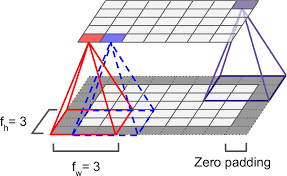


* As you traverse through the multiple convolutional layers you begin piecing the image together like a puzzle. The lower layers closer to the inputs handle lower level features. While higher layers (closer to the output) handles higher level features. 

#### Pooling Layer

* The Pooling Layer's goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting). 


<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" width= 300 height= 300>

### CNN Implementation

In [2]:
# Assigning all images of each folder to the corresponding variable and listing the amount of images for each variable
rock_dir = os.path.join('rps/rock/')
paper_dir = os.path.join('rps/paper/')
scissors_dir = os.path.join('rps/scissors/')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [3]:
# Listing the first 10 images of each folder
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']
['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']
['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


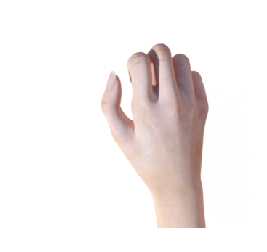

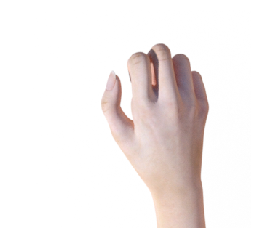

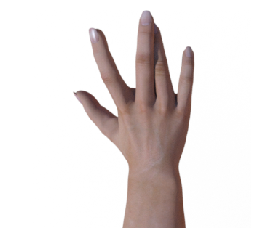

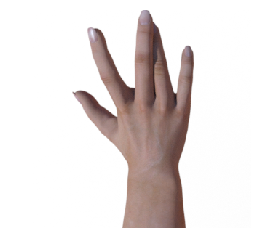

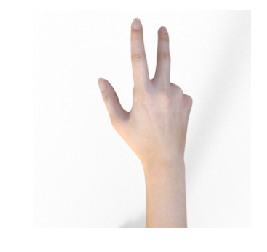

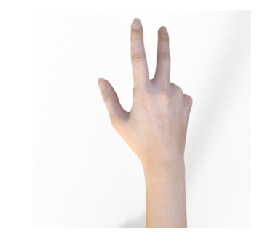

In [4]:
pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [12]:
#Generating the data of each image and editing the images orientation and scale.
TRAINING_DIR = 'rps/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
VALIDATION_DIR = 'rps-test-set/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### The tf.keras.layers.Dense(512, activation = 'relu') is basically making 512 functions that will each get all the 150 x 150 pixels and the Dense(3, activation ='softmax') is going to be the 3 neurons that are the outputs of the model so it will determine whether or not an image is a rock,paper or scissor and output ( 0 or 1 for true or false) for each category.

In [14]:
# Making the convolutions , and pooling to get rid of the noise of the image while keeping all our vital information.
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a Deep Neural Network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [15]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

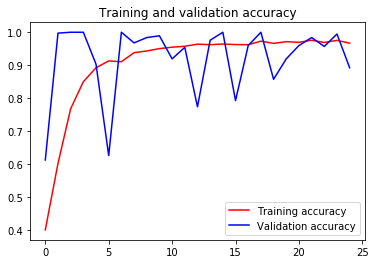

<Figure size 432x288 with 0 Axes>

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [2]:
# Assigning all images in the folder to the corresponding variable and listing the amount of images for each variable
galaxy_train_dir = os.path.join('images_training_rev1/')

print('total training galaxy images:', len(os.listdir(galaxy_train_dir)))

total training galaxy images: 61578


In [4]:
# Listing the first 10 images of each folder
Galaxy_files = sorted(os.listdir(galaxy_train_dir))
print(Galaxy_files[:10])

['100008.jpg', '100023.jpg', '100053.jpg', '100078.jpg', '100090.jpg', '100122.jpg', '100123.jpg', '100128.jpg', '100134.jpg', '100143.jpg']


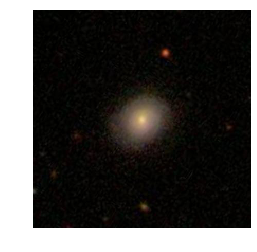

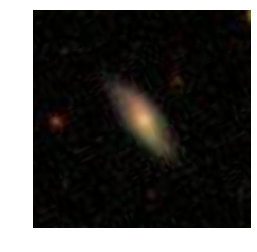

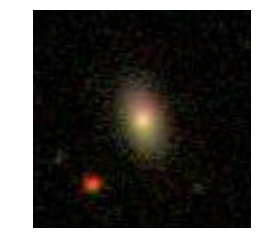

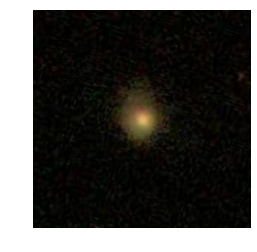

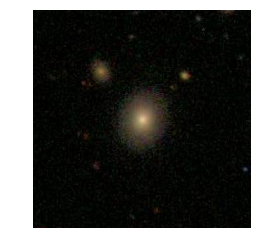

In [5]:
pic_index = 5

next_Galaxy = [os.path.join(galaxy_train_dir, fname) 
                for fname in Galaxy_files[:pic_index]]

for i, img_path in enumerate(next_Galaxy):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [3]:
#Generating the data of each image and editing the images orientation and scale.
TRAINING_DIR = 'images_training_revtest/'
training_datagen = ImageDataGenerator(  
      rescale = 1./255,      
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
VALIDATION_DIR = 'images_test_revtest/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

Found 328 images belonging to 3 classes.
Found 195 images belonging to 3 classes.


### The tf.keras.layers.Dense(512, activation = 'relu') is basically making 512 functions that will each get all the 150 x 150 pixels and the Dense(3, activation ='softmax') is going to be the 3 neurons that are the outputs of the model so it will determine whether or not an image is a Elliptical,Barred Spiral or Spiral and output ( 0 or 1 for true or false) for each morphology.

In [6]:
# Making the convolutions, and pooling to get rid of the noise of the image while keeping all our vital information.
model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=100, validation_data = validation_generator, verbose = 1)

model.save("Savingtest.csv")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       147584    
__________

11/11 [==============================] - 14s 1s/step - loss: 0.0780 - acc: 0.9695 - val_loss: 1.7324 - val_acc: 0.8000
Epoch 69/100
11/11 [==============================] - 14s 1s/step - loss: 0.1633 - acc: 0.9451 - val_loss: 1.7910 - val_acc: 0.8308
Epoch 70/100
11/11 [==============================] - 14s 1s/step - loss: 0.1713 - acc: 0.9543 - val_loss: 1.0641 - val_acc: 0.7949
Epoch 71/100
11/11 [==============================] - 14s 1s/step - loss: 0.1640 - acc: 0.9543 - val_loss: 1.3498 - val_acc: 0.7846
Epoch 72/100
11/11 [==============================] - 14s 1s/step - loss: 0.1363 - acc: 0.9634 - val_loss: 1.6965 - val_acc: 0.7231
Epoch 73/100
11/11 [==============================] - 14s 1s/step - loss: 0.1985 - acc: 0.9238 - val_loss: 1.1014 - val_acc: 0.8103
Epoch 74/100
11/11 [==============================] - 14s 1s/step - loss: 0.1499 - acc: 0.9543 - val_loss: 0.9666 - val_acc: 0.8051
Epoch 75/100
11/11 [==============================] - 13s 1s/step - loss: 0.1360 - acc: 0

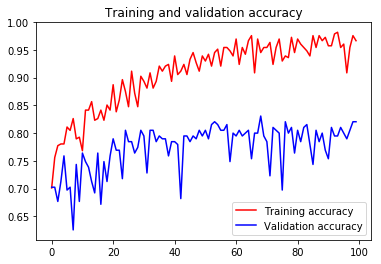

<Figure size 432x288 with 0 Axes>

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

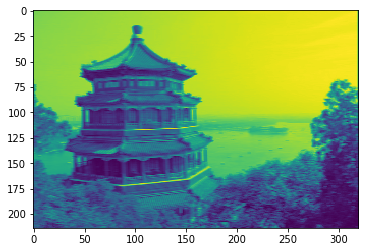

In [19]:
from sklearn.datasets import load_sample_images
# Load sample images
dataset = np.array(load_sample_images().images, dtype=np.float32)
batch_size, height, width, channels = dataset.shape
# Create 2 filters
filters_test = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters_test[:, 3, :, 0] = 1 # vertical line
filters_test[3, :, :, 1] = 1 # horizontal line
# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters_test, strides=[1,2,2,1], padding="SAME")
with tf.Session() as sess:
 output = sess.run(convolution, feed_dict={X: dataset})
plt.imshow(output[0, :, :, 1]) # plot 1st image's 2nd feature map
plt.show()


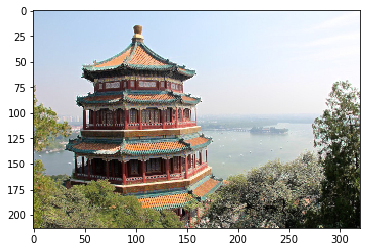

In [20]:
# Create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
 output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0].astype(np.uint8)) # plot the output for the 1st image
plt.show()

In [8]:
X = sorted(os.listdir('images_training_rev1/')) 

C:\Users\uneth\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\uneth\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Text(0.5, 1.0, 'Rescaled image')

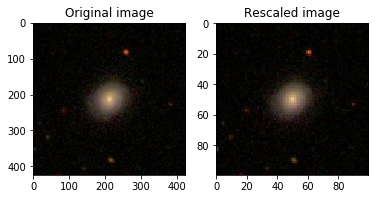

In [9]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

img = skimage.io.imread('images_training_rev1/'+X[0])

img_resized = resize(img,(100,100))

ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(img_resized, cmap='gray')
ax[1].set_title("Rescaled image")

### Sources

1. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow : concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O'Reilly Media. ISBN: 978-1491962299 


2. OllegnOllegn 9442816, Dgadga 18.4k33847, Salvador DaliSalvador Dali 122k87523617, Alyssa HaroldsenAlyssa Haroldsen 2, & Prostiprosti 7. (n.d.). TensorFlow, why was python the chosen language? Retrieved from https://stackoverflow.com/questions/35677724/tensorflow-why-was-python-the-chosen-language


3. Wikipedia contributors. (2019, May 10). Deep learning. In Wikipedia, The Free Encyclopedia. Retrieved 14:37, May 17, 2019, from https://en.wikipedia.org/w/index.php?title=Deep_learning&oldid=896400229
 

4. Wikipedia contributors. (2019, May 7). TensorFlow. In Wikipedia, The Free Encyclopedia. Retrieved 02:25, May 19, 2019, from https://en.wikipedia.org/w/index.php?title=TensorFlow&oldid=895937291